In [21]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 10 11:38:26 2021
@author: Snehameena
"""

'\nCreated on Sun Jan 10 11:38:26 2021\n@author: Snehameena\n'

# @  Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# @  Read Data

In [23]:
#Read Data
df = pd.read_csv('..\Data\CarPrice_Assignment.csv')
#Extract CarCompany Name from CarName
df['CarCompany'] = df['CarName'].str.split(" ").str.get(0)

# @  Clean Data

In [24]:
#********************Data Cleaning*********************************
#Replace CyliderNumer Texts with Numbers
cylinder = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
df['cylindernumber'] = df['cylindernumber'].replace(cylinder).astype(int)
doorno = {'two':2,'four':4}
df['doornumber'] = df['doornumber'].replace(doorno).astype(int)


# @ Encode Categorical Varaibles

In [25]:
#********************Encoding*********************************
#Label Encoding
label_columns = ['aspiration', "carbody", 'enginetype', 'CarCompany','fueltype','fuelsystem']
for column in label_columns:
    unique_items = df[column].unique().tolist()
    temp_dict = {}
    for idx, item in enumerate(unique_items):
        temp_dict[item] = idx+1
    df[column] = df[column].replace(temp_dict)
# =============================================================================
# #One-Hot Encoding
# onehot_columns = ['aspiration', "carbody", 'enginetype', 'CarCompany','fueltype','fuelsystem']
# df = pd.get_dummies(df, columns=onehot_columns, prefix=onehot_columns)
# =============================================================================
#Log Cleaned Csv
df.to_csv('CarAssignent_Processed.csv')

# @ Data Correlation

wheelbase         0.577816
carlength         0.682920
carwidth          0.759325
curbweight        0.835305
cylindernumber    0.718305
enginesize        0.874145
boreratio         0.553173
horsepower        0.808139
citympg          -0.685751
highwaympg       -0.697599
price             1.000000
Name: price, dtype: float64


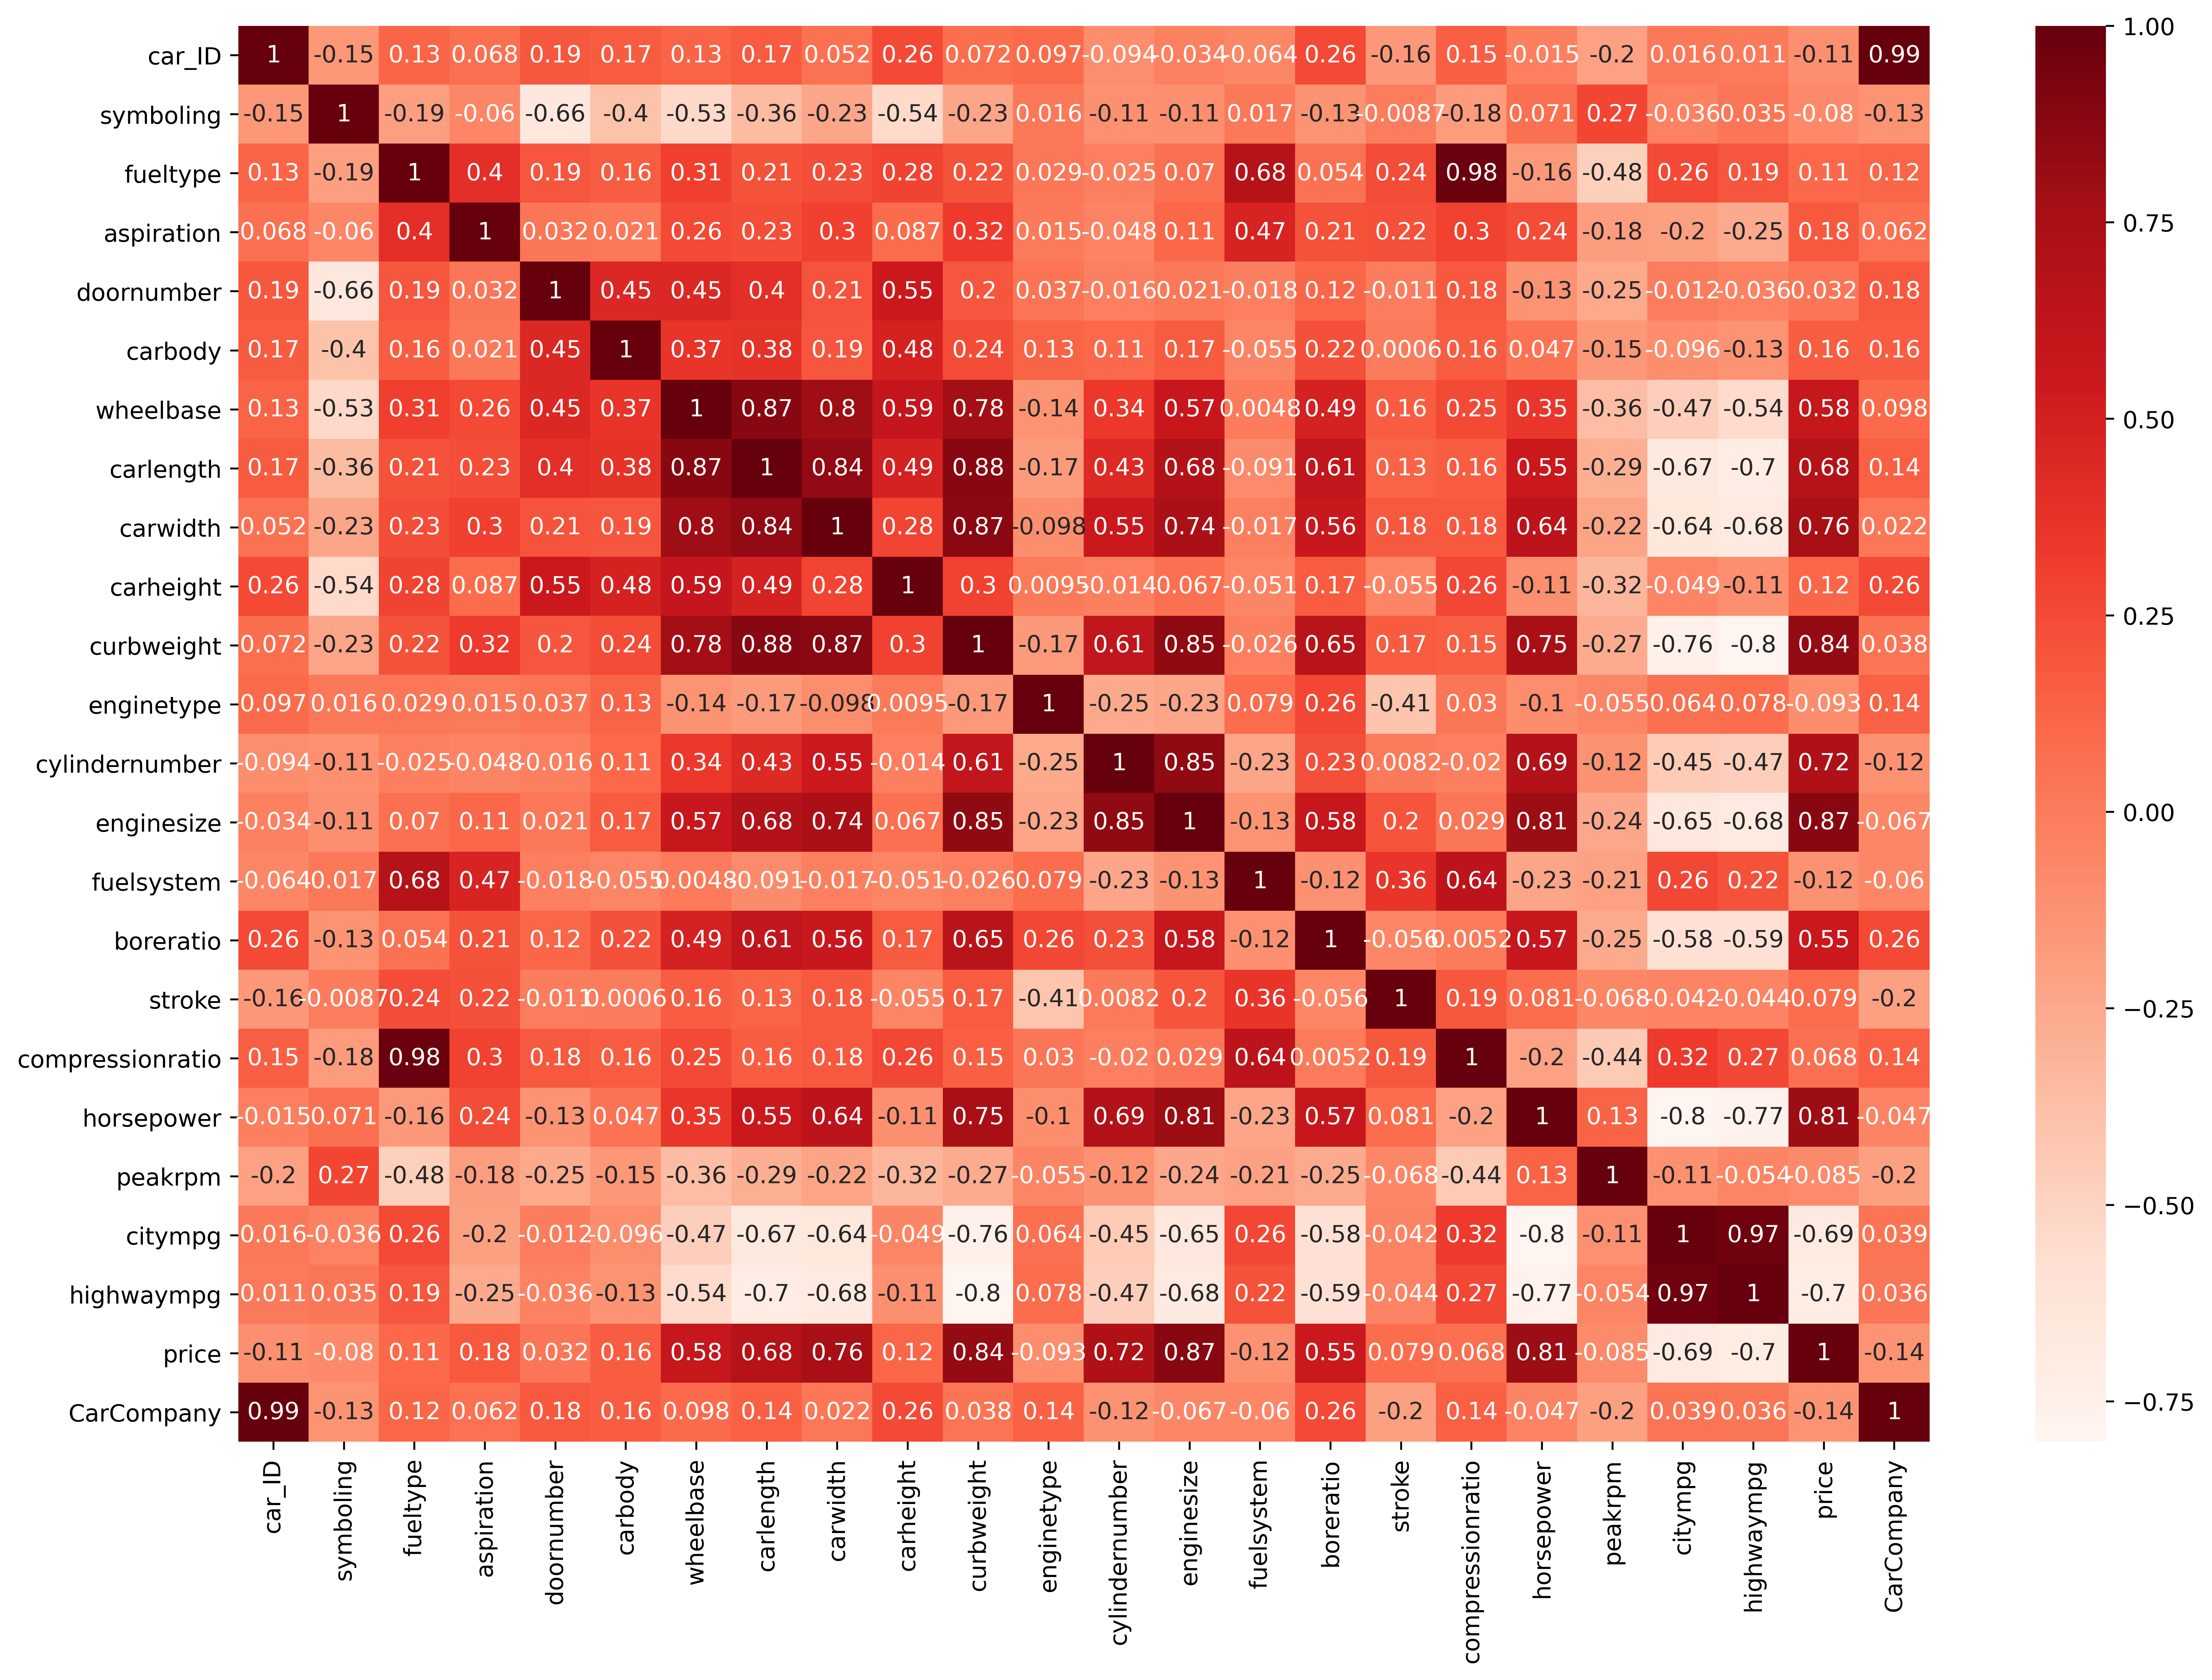

In [26]:

#********************Data Correlation*********************************
#Using Pearson Correlation to Select Features
cor = df.corr()
cor.to_csv('Correlation_Results.csv')
#Positive & Negative Correlation
final_cor = cor.price[~cor.price.between(-0.5,0.5)]
print(final_cor)

#Plot HeatMap for Correlation
plt.figure(figsize=(16,11),dpi=500)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#Save Heatmap
plt.savefig('heatmap.jpg', dpi = 500)

# @ Test/Train Split

In [27]:
#Get Variables to be used for Linear Regression
variables = ['carlength','carwidth','curbweight','cylindernumber','enginesize','horsepower','citympg']
X = df[['enginesize','curbweight','horsepower','carwidth','cylindernumber','carlength','citympg','CarCompany']]
y = df['price']
#Train/Test Split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

#  @ Model Training

In [31]:
#********************Model*********************************
#Define Linear Regression Model
regr = linear_model.LinearRegression()
#Train & Fit
regr.fit(x_train, y_train)
accuracy = regr.score(x_train,y_train)
print('Train Accuracy --> ' + str(accuracy))

Train Accuracy --> 0.8409549853447922


# @ Predict & Compute Score 

In [30]:
#Predict using Test Data
y_pred = regr.predict(x_test)
#Calculate Score & Accuracy
r2 = r2_score(y_test,y_pred)
accuracy_test = regr.score(x_test,y_test)
print('r2 Score -->' + str(r2) )
print('Test Accuracy --> ' + str(accuracy_test))

r2 Score -->0.8013848043932568
Test Accuracy --> 0.8013848043932568
